### R code to plot beeswarm with CVC-score data in the condition Speech at BCD-side (65 dB) and Noise in front of the subject (65 dB)

25 January 2022 Guido Cattani

In [1]:
library('data.table')
library("beeswarm")

In [2]:
read_CVC <- function(path_in) {
  dt <- read.csv(path_in)
  dt <- dt[ -c(5)]
  return(dt)
}

In [3]:
# input file
fin <- 'CVC_Sbcd65_Nfront65.csv'

In [4]:
# input directory
din <- '/media/guido/LACIE/Cingle_Guido/Master/Implant/Calculated_data/'

In [5]:
# input file path
pin <- paste(din, fin, sep = "")

In [6]:
# output directory
dout = "/media/guido/LACIE/Cingle_Guido/Master/Implant/Figures_R/"

In [7]:
# output path
stm <- gsub('.{4}$', '', fin)
stm <- gsub('[[:digit:]]+', '', stm)
ext <- '.tiff'
pout <- paste(dout, stm, ext, sep = "")

In [8]:
bh5 <- read_CVC(pin)
bh5

Study_ID,AC_path,BC_path,AC.BC_path
<int>,<dbl>,<dbl>,<dbl>
34,0.73,0.85,0.83
35,0.73,0.85,0.82
43,0.74,0.85,0.78
47,0.74,0.83,0.84
50,0.74,0.84,0.77
53,0.74,0.79,0.78
54,0.73,0.81,0.85
56,0.73,0.82,0.86
59,0.74,0.78,0.78


In [9]:
bh5_long <- melt(setDT(bh5), id.vars = c('Study_ID'), 
                 value.name = 'CVC_score', variable.name = 'Sound_path')
bh5_long

Study_ID,Sound_path,CVC_score
<int>,<fct>,<dbl>
34,AC_path,0.73
35,AC_path,0.73
43,AC_path,0.74
47,AC_path,0.74
50,AC_path,0.74
53,AC_path,0.74
54,AC_path,0.73
56,AC_path,0.73
59,AC_path,0.74


In [10]:
clm = colnames(bh5)
sp = clm[-1]

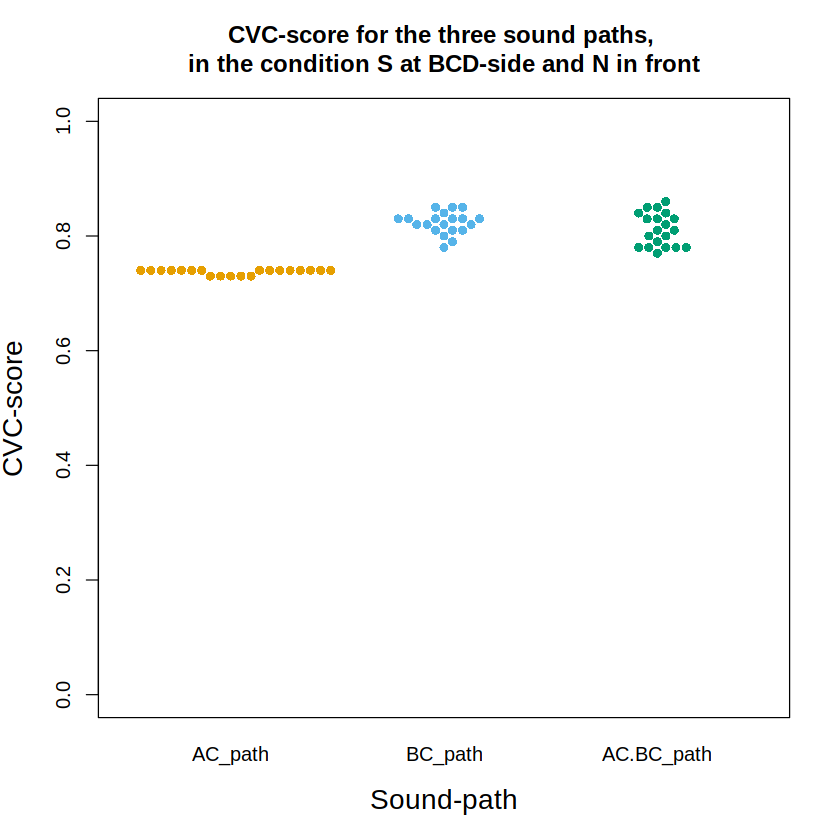

In [11]:
ttl = "CVC-score for the three sound paths, 
in the condition S at BCD-side and N in front"
ColorBlind3  <- c("#E69F00", "#56B4E9", "#009E73")
p <- beeswarm(CVC_score ~ Sound_path, data = bh5_long, pch = 16, col = ColorBlind3, 
              ylab = "CVC-score", xlab = "Sound-path", cex.lab=1.4, 
              main = ttl, 
              ylim=c(0, 1))
#l <- legend("topright", legend = sp, title = "Sound-path", cex=1.1, pch = 16, col = ColorBlind3)

In [12]:
# save tiff
tiff(pout, units="in", width=7, height=7, res=300)
ColorBlind3  <- c("#E69F00", "#56B4E9", "#009E73")
beeswarm(CVC_score ~ Sound_path, data = bh5_long, pch = 16, col = ColorBlind3, 
         ylab = "CVC-score", xlab = "Sound-path", cex.lab=1.4, ylim=c(0, 1))
#legend("topright", legend = sp, title = "Sound-path", pch = 16, col = ColorBlind3, cex = 1.1)
dev.off()

png 
  2